In [69]:
# necessary imports
# Pandas to read in the CSV file and create the data frame
import pandas as pd
# NumPy for some basic mathematical functions
import numpy as np
from numpy import sort
# Xgboost for optimized distributed gradient boosting
from xgboost import XGBClassifier, plot_tree, plot_importance
# scikit-learn for simple and efficient tools for data mining and data analysis
from sklearn.model_selection import (train_test_split, GridSearchCV, StratifiedShuffleSplit,
cross_val_score, cross_val_predict, StratifiedKFold, KFold)
from sklearn.metrics import (accuracy_score, auc, confusion_matrix, make_scorer, 
precision_recall_curve, recall_score, precision_score, f1_score, matthews_corrcoef,
brier_score_loss, roc_curve, roc_auc_score)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import shuffle
# Imblearn for imbalanced-learn package
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
# matplotlib : Python 2D plotting library
import matplotlib.pyplot as plt
# seaborn : Python data visualization library based on matplotlib
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('PFT_INFO_AGG_2018.csv', engine='python', sep=';')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(376339, 30)

In [5]:
df.head(10)

,sexe,tmg_round,nb_support,age,anciennete,anciennete_em,part_uc,encours,capres_rmc,rentier,...,Opportunite_achats_importants,Opportunite_epargner,Capacite_epargne_actuelle,Sit_fin_perso_passee,Sit_fin_perso_evolution,Capacite_epargne_future,sortant_sum,entrant_sum,nb,arb
0,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-9.048467,4.671663,11.908475,-29.431570,-15.650491,-8.209142,0.0,0.0,3,0
1,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-5.073132,5.164927,9.709774,-24.159897,-12.251141,-7.697894,0.0,0.0,2,0
2,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-2.640918,4.621879,10.723456,-17.142681,-9.831470,0.110471,0.0,0.0,5,0
3,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-3.393839,5.009052,10.543828,-22.883813,-18.599835,-8.237354,0.0,0.0,2,0
4,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-8.958185,7.580520,10.691414,-26.883150,-13.402602,-8.633219,0.0,0.0,1,0
5,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-4.059026,4.136823,11.846073,-19.288271,-9.691206,-1.416496,0.0,0.0,3,0
6,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-5.313490,7.601280,9.866086,-24.971824,-12.965254,-3.817514,0.0,0.0,2,0
7,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-2.238694,8.423216,12.570997,-15.987312,-12.333135,-2.695195,0.0,0.0,4,0
8,F,0.0,10,0,0.0,0.0,0.00,a) inf 8k,0,I,...,-3.392310,3.964662,9.590150,-26.321109,-11.550336,-9.212457,0.0,0.0,1,0
9,F,0.0,10,0,0.0,0.0,0.25,a) inf 8k,0,I,...,-5.073132,5.164927,9.709774,-24.159897,-12.251141,-7.697894,0.0,0.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376339 entries, 0 to 376338
Data columns (total 30 columns):
sexe                             376339 non-null object
tmg_round                        376339 non-null float64
nb_support                       376339 non-null int64
age                              376339 non-null int64
anciennete                       376336 non-null float64
anciennete_em                    376336 non-null float64
part_uc                          376339 non-null float64
encours                          376339 non-null object
capres_rmc                       376339 non-null int64
rentier                          376339 non-null object
cac_m1                           376339 non-null float64
cac_m2                           376339 non-null float64
cac_m3                           376339 non-null float64
cac_m12                          376339 non-null float64
Opinion_des_menages              376339 non-null float64
Niveau_de_vie_passee             376339 non

In [7]:
# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head(10)

,sexe,tmg_round,nb_support,age,anciennete,anciennete_em,part_uc,encours,capres_rmc,rentier,...,Opportunite_achats_importants,Opportunite_epargner,Capacite_epargne_actuelle,Sit_fin_perso_passee,Sit_fin_perso_evolution,Capacite_epargne_future,sortant_sum,entrant_sum,nb,arb
0,M,0.0,10,46,7.0,7.0,0.00,a) inf 8k,0,I,...,-8.305295,6.742057,11.199373,-27.658955,-11.289518,-1.664328,0.0,0.0,6,0
1,F,0.0,10,78,0.0,0.0,0.00,b) 8k - 20k,0,I,...,-8.958185,7.580520,10.691414,-26.883150,-13.402602,-8.633219,0.0,0.0,1,0
2,F,0.0,10,62,2.0,2.0,0.00,c) 20k - 44k,0,I,...,-8.343097,5.386757,9.832064,-29.770558,-16.161008,-9.258645,0.0,0.0,4,0
3,F,0.0,10,66,3.0,3.0,0.00,a) inf 8k,0,I,...,-2.238694,8.423216,12.570997,-15.987312,-12.333135,-2.695195,0.0,0.0,20,0
4,F,0.0,10,84,3.0,3.0,0.00,e) sup 44k,1,P,...,-5.313490,7.601280,9.866086,-24.971824,-12.965254,-3.817514,0.0,0.0,1,0
5,F,0.0,10,71,4.0,4.0,0.15,a) inf 8k,0,I,...,-4.059026,4.136823,11.846073,-19.288271,-9.691206,-1.416496,0.0,0.0,1,0
6,F,0.0,10,54,12.0,11.0,0.00,b) 8k - 20k,0,I,...,-3.392310,3.964662,9.590150,-26.321109,-11.550336,-9.212457,0.0,0.0,1,0
7,M,0.0,10,83,2.0,2.0,0.19,a) inf 8k,1,P,...,-5.313490,7.601280,9.866086,-24.971824,-12.965254,-3.817514,0.0,0.0,1,0
8,M,0.0,10,49,9.0,9.0,0.00,a) inf 8k,1,C,...,-3.393839,5.009052,10.543828,-22.883813,-18.599835,-8.237354,0.0,0.0,1,0
9,F,0.0,10,56,6.0,6.0,0.00,b) 8k - 20k,0,I,...,-2.238694,8.423216,12.570997,-15.987312,-12.333135,-2.695195,0.0,0.0,2,0


In [8]:
df = df.drop(['sortant_sum','entrant_sum'], axis=1)
df.shape

(376339, 28)

In [9]:
df.arb.value_counts()

 0    374182
 1      1813
-1       344
Name: arb, dtype: int64

In [10]:
# Recoder la variable arbitrage
df['arb']=df['arb'].eq(1).astype('int')
df.arb.value_counts()

0    374526
1      1813
Name: arb, dtype: int64

In [11]:
df.groupby('arb').nb.sum()

arb
0    792859
1      1860
Name: nb, dtype: int64

In [12]:
# List categorical variables
df.describe(include='object')

,sexe,encours,rentier
count,376339,376339,376339
unique,2,4,3
top,F,a) inf 8k,I
freq,214664,154997,286869


In [13]:
pd.factorize(df.sexe)

(array([0, 1, 1, ..., 1, 1, 1]), Index(['M', 'F'], dtype='object'))

In [14]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])

In [15]:
label_mapping

{'sexe': Index(['M', 'F'], dtype='object'),
 'encours': Index(['a) inf 8k', 'b) 8k - 20k', 'c) 20k - 44k', 'e) sup 44k'], dtype='object'),
 'rentier': Index(['I', 'P', 'C'], dtype='object')}

In [16]:
df.describe()

,sexe,tmg_round,nb_support,age,anciennete,anciennete_em,part_uc,encours,capres_rmc,rentier,...,Prix_evol_passee,Prix_evol_futur,Opportunite_achats_importants,Opportunite_epargner,Capacite_epargne_actuelle,Sit_fin_perso_passee,Sit_fin_perso_evolution,Capacite_epargne_future,nb,arb
count,376339.000000,376339.000000,376339.0,376339.000000,376336.000000,376336.000000,376339.000000,376339.000000,376339.000000,376339.000000,...,376339.000000,376339.000000,376339.000000,376339.000000,376339.000000,376339.000000,376339.000000,376339.000000,376339.00000,376339.000000
mean,0.570401,0.000060,10.0,65.165170,9.077000,6.655869,0.260249,1.196129,0.222034,0.259335,...,-31.419337,-21.299741,-5.857779,6.298946,10.801240,-24.603328,-12.978399,-5.558621,2.11171,0.004817
std,0.495020,0.001122,0.0,20.364807,6.643746,4.189708,0.292923,1.180306,0.415614,0.485053,...,10.651979,5.258837,2.588192,2.248272,0.924785,4.543547,2.524500,3.285806,4.90663,0.069241
min,0.000000,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-47.350682,-33.992008,-9.048467,3.964662,9.590150,-29.770558,-18.599835,-9.258645,1.00000,0.000000
25%,0.000000,0.000000,10.0,53.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,-37.771723,-24.739691,-8.801243,4.671663,9.832064,-29.320784,-15.650491,-8.633219,1.00000,0.000000
50%,1.000000,0.000000,10.0,73.000000,8.000000,7.000000,0.200000,1.000000,0.000000,0.000000,...,-29.794865,-20.226812,-5.313490,5.386757,10.691414,-26.321109,-12.333135,-7.697894,1.00000,0.000000
75%,1.000000,0.000000,10.0,80.000000,14.000000,11.000000,0.400000,2.000000,0.000000,0.000000,...,-25.023733,-16.282375,-3.393839,7.601280,11.203815,-22.883813,-11.550336,-2.695195,1.00000,0.000000
max,1.000000,0.030000,10.0,105.000000,30.000000,17.000000,1.000000,3.000000,1.000000,2.000000,...,-13.815963,-14.495541,-2.238694,12.010025,12.570997,-15.987312,-9.691206,0.110471,117.00000,1.000000


In [17]:
df.isnull().sum()

sexe                             0
tmg_round                        0
nb_support                       0
age                              0
anciennete                       3
anciennete_em                    3
part_uc                          0
encours                          0
capres_rmc                       0
rentier                          0
cac_m1                           0
cac_m2                           0
cac_m3                           0
cac_m12                          0
Opinion_des_menages              0
Niveau_de_vie_passee             0
Niveau_de_vie_evolution          0
Chomage_evolution                0
Prix_evol_passee                 0
Prix_evol_futur                  0
Opportunite_achats_importants    0
Opportunite_epargner             0
Capacite_epargne_actuelle        0
Sit_fin_perso_passee             0
Sit_fin_perso_evolution          0
Capacite_epargne_future          0
nb                               0
arb                              0
dtype: int64

In [18]:
df['anciennete'].fillna((df['anciennete'].median()), inplace=True)
df['anciennete_em'].fillna((df['anciennete_em'].median()), inplace=True)

Class 0: 374526
Class 1: 1813
Proportion: 206.58 : 1


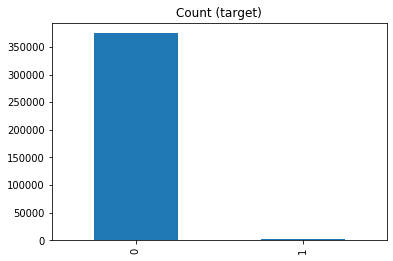

In [19]:
# Imbalanced datasets
target_count = df.arb.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [59]:
#sns.pairplot(df, hue="arb")

In [20]:
normal_df = df[df.arb == 0] #save normal_df observations into a separate df
arbitrage_df = df[df.arb == 1] #do the same for arbitrage

In [21]:
sexe=arbitrage_df.groupby('sexe')['arb'].count()
age=arbitrage_df.groupby('age')['arb'].count()
anciennete=arbitrage_df.groupby('anciennete')['arb'].count()
part_uc=arbitrage_df.groupby('part_uc')['arb'].count()
encours=arbitrage_df.groupby('encours')['arb'].count()

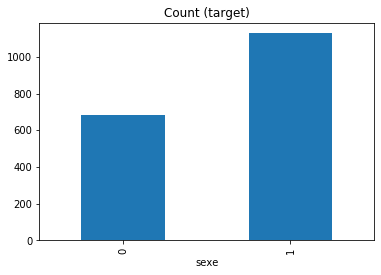

In [22]:
sexe.plot(kind='bar', title='Count (target)')

In [23]:
# split data into X and y
#X = pd.DataFrame(df_subset[['sexe','age','anciennete_em','taux_uc','vac_euro_net','capres']])
X = df.drop(['arb'], axis=1)
y = df.arb
print(type(X),X.shape)
print(type(y))

<class 'pandas.core.frame.DataFrame'> (376339, 27)
<class 'pandas.core.series.Series'>


In [24]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

# Show the class distribution in each label set
def get_class_dist(data, name):
    unique, counts = np.unique(data, return_counts=True)
    pct = 100*(counts/len(data))
    d = dict(zip(unique, zip(counts, pct)))
    print(len(data), 'total examples in %s' % name)
    for key, values in d.items():
        print('class %d: %d examples,' % (key, values[0]), "{0:.2f}%".format(values[1]))
    print('')
    return
 
get_class_dist(data=y_train, name='y_train')
get_class_dist(data=y_test, name='y_test')

252147 total examples in y_train
class 0: 250978 examples, 99.54%
class 1: 1169 examples, 0.46%

124192 total examples in y_test
class 0: 123548 examples, 99.48%
class 1: 644 examples, 0.52%



In [26]:
# Normalize the data : MinMaxScaler
#mm_scaler = MinMaxScaler()
#X_train_std = pd.DataFrame(mm_scaler.fit_transform(X_train),columns = X_train.columns)
#X_test_std = pd.DataFrame(mm_scaler.fit_transform(X_test),columns = X_test.columns)

mm_scaler = MinMaxScaler().fit(X_train)

X_train_std = pd.DataFrame(mm_scaler.transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(mm_scaler.transform(X_test),columns = X_test.columns)

scaler = MinMaxScaler()
X_std = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

print(X_train_std.shape)
print(type(X_train_std))
print(X_test_std.shape)
print(type(X_test_std))
print(X_std.shape)
print(type(X_std))

(252147, 27)
<class 'pandas.core.frame.DataFrame'>
(124192, 27)
<class 'pandas.core.frame.DataFrame'>
(376339, 27)
<class 'pandas.core.frame.DataFrame'>


In [27]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

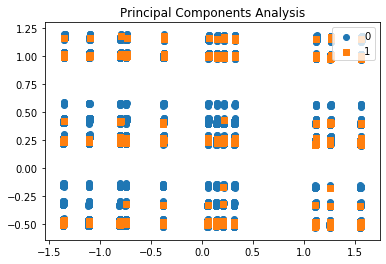

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
plot_2d_space(X_pca, y, 'Principal Components Analysis')

In [31]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train_std, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test_std)

# Checking accuracy
print("Accuracy: %.2f%%" % (accuracy_score(y_test, lr_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, lr_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, lr_pred)

Accuracy: 99.48%
MCC: 0.00%

Confusion Matrix


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


array([[123548,      0],
       [   644,      0]])

In [32]:
# train model
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42).fit(X_train_std, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test_std)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, rfc_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, rfc_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, rfc_pred)

Accuracy: 99.60%
MCC: 50.81%

Confusion Matrix


array([[123477,     71],
       [   423,    221]])

In [33]:
# train model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_std, y_train)

# predict on test set
brf_pred = brf.predict(X_test_std)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, brf_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, brf_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, brf_pred)

Accuracy: 84.68%
MCC: 12.67%

Confusion Matrix


array([[104659,  18889],
       [   133,    511]])

In [34]:
# train model
xgb = XGBClassifier(n_jobs=-1).fit(X_train_std, y_train)

# predict on test set
xgb_pred = xgb.predict(X_test_std)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, xgb_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, xgb_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, xgb_pred)

Accuracy: 99.60%
MCC: 49.98%

Confusion Matrix


array([[123484,     64],
       [   433,    211]])

In [35]:
# train model
abc = AdaBoostClassifier().fit(X_train_std, y_train)

# predict on test set
abc_pred = abc.predict(X_test_std)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, abc_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, abc_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, abc_pred)

Accuracy: 99.48%
MCC: 7.02%

Confusion Matrix


array([[123547,      1],
       [   640,      4]])

Confusion matrix:
 [[123484     64]
 [   433    211]]


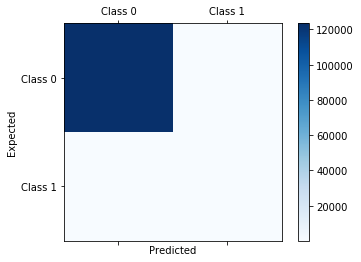

In [36]:
# Confusion matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [37]:
def model_resampling(model, X, y, resampling, calibrate, k=5, random_state=42, print_res = True):
    # Convert inputs to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Define the cross-validation parameters
    # Common values of k are 5 and 10, as these have been shown experimentally to produce the best results
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)
    
    # Create lists to save results to
    mcc = []
    brier = []
    actual_goals = []
    pred_goals = []
    accuracy = []
    f1 = []
    recall = []
    model_name = model.__class__.__name__
    
    # Create training and test data using cross validation and fit model for each fold
    for ii, (train_index, valid_index) in enumerate(cv.split(X, y)):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if resampling == None:
            res = 'no'
        else:
            X_train, y_train = resampling.fit_resample(X_train, y_train)
            res = resampling.__class__.__name__
        
        # Normalize the data
        #ss = StandardScaler()
        mm_scaler = MinMaxScaler().fit(X_train)

        X_train_std = mm_scaler.transform(X_train)
        X_valid_std = mm_scaler.transform(X_valid)

        # Calibrate model if necessary
        if calibrate == None:
            calibrated_probs = 'uncalibrated probabilities'
            model.fit(X_train_std, y_train)
        else:
            model = CalibratedClassifierCV(model, cv=2, method=calibrate)
            model.fit(X_train_std, y_train)
            calibrated_probs = '%s calibration' % calibrate
            
        y_pred = model.predict(X_valid_std)
        y_pred_proba = model.predict_proba(X_valid_std)[:,1]
 
        # Calculate mcc score, brier_loss and sum of predicted goal probabilities
        actual_goals.append(sum(y_valid))
        pred_goals.append(sum(y_pred_proba))
        mcc.append(matthews_corrcoef(y_valid, y_pred))
        brier.append(brier_score_loss(y_valid, y_pred_proba))
        f1.append(f1_score(y_valid, y_pred))
        recall.append(recall_score(y_valid, y_pred))
        accuracy.append(accuracy_score(y_valid, y_pred))
        
        # Save the results to a dataframe
    check = pd.DataFrame()
    check['mcc'] = mcc
    check['brier_loss'] = brier
    check['actual_goals'] = actual_goals
    check['predicted_goals'] = pred_goals
    check['goals_diff'] = abs(check['actual_goals'] - check['predicted_goals'])
    check['f1'] = f1
    check['recall'] = recall
    check['accuracy'] = accuracy
    
    # Print a summary of the results if required
    if print_res == True:
        print('Method: %s with %s resampling and %s'
              % (model_name, res, calibrated_probs))
        print('Goals:', '{0:.2f}'.format(check['actual_goals'].mean()))
        print('Predicted Goals:', '{0:.2f}'.format(check['predicted_goals'].mean()))
        print('MCC:', '{0:.2%}'.format(check['mcc'].mean()))
        print('Brier Loss:', '{0:.2%}'.format(check['brier_loss'].mean()))
        print('F1_score:', '{:.2%}'.format(check['f1'].mean()))
        print('Recall_score:', '{:.2%}'.format(check['recall'].mean()))
        print('Accuracy:', '{:.2%}'.format(check['accuracy'].mean()))
        print('')
    else: pass
 
    return check

In [38]:
# Define a function to plot barplot comparisons of models
def barplot_comparison(df, x='name', y1='mcc', y2='brier_loss', figsize=(18, 8)):
    sns.set(style='white')
 
    f, axs = plt.subplots(ncols=2, figsize=figsize, sharey=False)
     
    # Plot bars
    sns.barplot(x=x, y=y1, data=df, palette='muted', ax=axs[0])
    sns.barplot(x=x, y=y2, data=df, palette='muted', ax=axs[1])
 
    # Tweak the visual presentation
    axs[0].yaxis.grid(True)
    axs[0].set(xlabel="", ylim=(min(df[y1]-0.02),max(df[y1]+0.02)))
    axs[1].yaxis.grid(True)
    axs[1].set(xlabel="", ylim=(min(df[y2]-0.02),max(df[y2]+0.02)))
    sns.despine(trim=True, left=True);
     
    return

/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in do

Method: LogisticRegression with no resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 362.83
MCC: 0.00%
Brier Loss: 0.46%
F1_score: 0.00%
Recall_score: 0.00%
Accuracy: 99.52%

Method: RandomForestClassifier with no resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 353.32
MCC: 50.41%
Brier Loss: 0.34%
F1_score: 46.64%
Recall_score: 33.70%
Accuracy: 99.63%

Method: BalancedRandomForestClassifier with no resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 21695.11
MCC: 12.16%
Brier Loss: 11.73%
F1_score: 4.75%
Recall_score: 78.71%
Accuracy: 84.79%



/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Method: AdaBoostClassifier with no resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 35909.20
MCC: 4.96%
Brier Loss: 22.82%
F1_score: 1.09%
Recall_score: 0.55%
Accuracy: 99.52%

Method: XGBClassifier with no resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 365.07
MCC: 50.23%
Brier Loss: 0.35%
F1_score: 45.47%
Recall_score: 31.83%
Accuracy: 99.63%



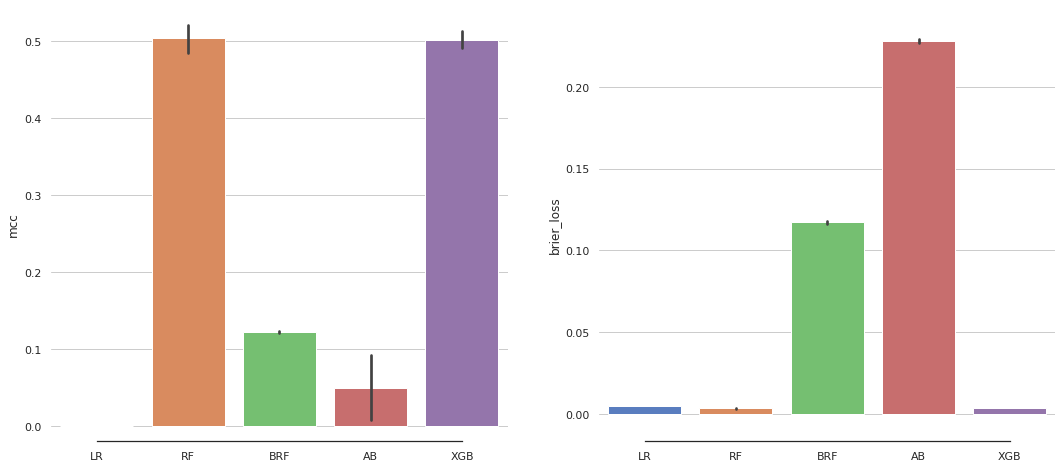

In [39]:
# Model results without resampling
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
lr = LogisticRegression(solver='lbfgs')
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)

models = []
models.append(('LR', lr, None, None))
models.append(('RF', rf, None, None))
models.append(('BRF', brf, None, None))
models.append(('AB', ab, None, None))
models.append(('XGB', xgb, None, None))
 
results_df = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result = model_resampling(model, X, y, resampling, calibrate)
    result['name'] = name
    results_df = results_df.append(result)
     
barplot_comparison(results_df)

In [202]:
import joblib  # to check you can parallelize GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(model, 
                   {'max_depth': [2,4,6], 
                    'n_estimators': [50,100,200]}, 
                   scoring = 'brier_score_loss', verbose=1, n_jobs=1, pre_dispatch=1, cv=5)
clf.fit(X_std,y)
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 15.0min finished


(-0.0046970043442646865, {'max_depth': 6, 'n_estimators': 100})

In [242]:
# fit model on all training data
#model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model = XGBClassifier(nthread=-1,random_state=42)
model.fit(X_std, y)
# make predictions for test data and evaluate
y_pred = model.predict(X_std)
predictions = [round(value) for value in y_pred]
mcc = matthews_corrcoef(y, predictions)
print("MCC: %.2f%%" % (mcc * 100.0))
# Fit model using each importance as a threshold
thresholds = np.unique(sort(model.feature_importances_))
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X = selection.transform(X_std)
    # train model
    #selection_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    selection_model = XGBClassifier(nthread=-1,random_state=42)
    selection_model.fit(select_X, y)
    # eval model
    select_X = selection.transform(X_std)
    y_pred = selection_model.predict(select_X)
    predictions = [round(value) for value in y_pred]
    mcc = matthews_corrcoef(y, predictions)
    print("Thresh=%.3f, n=%d, MCC: %.2f%%" % (thresh, select_X.shape[1], mcc*100.0))

MCC: 50.78%
Thresh=0.000, n=27, MCC: 50.78%
Thresh=0.002, n=19, MCC: 50.78%
Thresh=0.003, n=17, MCC: 50.78%
Thresh=0.008, n=14, MCC: 50.75%
Thresh=0.010, n=12, MCC: 50.61%
Thresh=0.016, n=8, MCC: 50.57%
Thresh=0.054, n=7, MCC: 50.46%
Thresh=0.078, n=6, MCC: 50.72%
Thresh=0.110, n=5, MCC: 50.37%
Thresh=0.133, n=4, MCC: 50.81%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Thresh=0.140, n=3, MCC: 0.00%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Thresh=0.200, n=2, MCC: 0.00%
Thresh=0.203, n=1, MCC: 0.00%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [40]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_std, y)
sfm = SelectFromModel(rfc, threshold = 0.01, prefit=True)
X_important = pd.DataFrame(sfm.transform(X), columns = X.columns[sfm.get_support()])

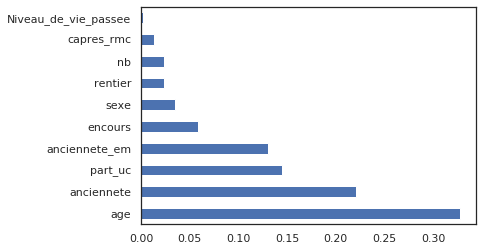

In [41]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_std.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [42]:
rfc_pred = rfc.predict(X_std)

print("Accuracy: %.2f%%" % (accuracy_score(y, rfc_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y, rfc_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y, rfc_pred)

Accuracy: 99.98%
MCC: 97.42%

Confusion Matrix


array([[374522,      4],
       [    88,   1725]])

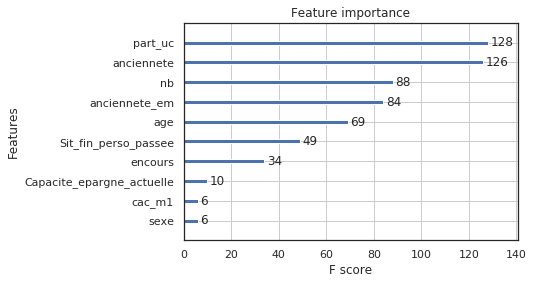

In [43]:
xgb = XGBClassifier(nthread=-1,random_state=42)
xgb.fit(X_std, y)
sfm = SelectFromModel(xgb, threshold = 0.01, prefit=True)
X_important = pd.DataFrame(sfm.transform(X), columns = X.columns[sfm.get_support()])
# plot feature importance
plot_importance(xgb,max_num_features=10)
plt.show()

In [44]:
xgb_pred = xgb.predict(X_std)

print("Accuracy: %.2f%%" % (accuracy_score(y, xgb_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y, xgb_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y, xgb_pred)

Accuracy: 99.64%
MCC: 50.78%

Confusion Matrix


array([[374377,    149],
       [  1224,    589]])

In [45]:
X_important.shape, type(X_important), X_important.columns

((376339, 8),
 pandas.core.frame.DataFrame,
 Index(['age', 'anciennete', 'anciennete_em', 'part_uc', 'encours',
        'Capacite_epargne_actuelle', 'Sit_fin_perso_passee', 'nb'],
       dtype='object'))

Method: XGBClassifier with no resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 365.11
MCC: 50.32%
Brier Loss: 0.35%
F1_score: 45.54%
Recall_score: 31.88%
Accuracy: 99.63%

Method: XGBClassifier with SMOTE resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 11070.14
MCC: 17.69%
Brier Loss: 4.69%
F1_score: 10.43%
Recall_score: 61.89%
Accuracy: 94.86%

Method: XGBClassifier with TomekLinks resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 366.65
MCC: 50.54%
Brier Loss: 0.35%
F1_score: 45.90%
Recall_score: 32.27%
Accuracy: 99.63%

Method: XGBClassifier with EditedNearestNeighbours resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 377.90
MCC: 50.81%
Brier Loss: 0.35%
F1_score: 46.47%
Recall_score: 32.98%
Accuracy: 99.63%

Method: XGBClassifier with SMOTETomek resampling and uncalibrated probabilities
Goals: 362.60
Predicted Goals: 11029.89
MCC: 17.76%
Brier Loss: 4.66%
F1_score: 10.49%
Recall_score: 6

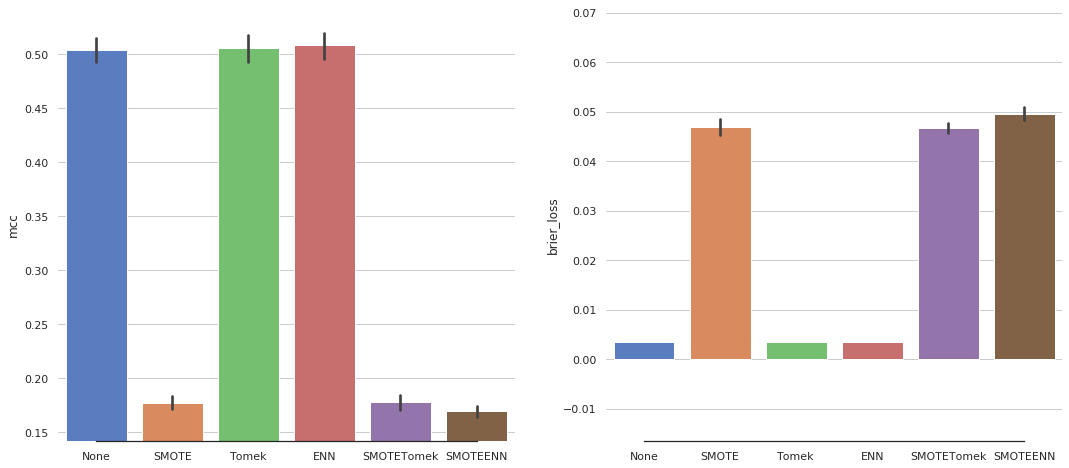

In [46]:
# Try different re-sampling methods with a RandomForestClassifier
# For some reason sklearn and imblearn's default is to use only one processor core
# Most people have multiple cores these days!
# n_jobs=-1 will run the model on all cores in parallel, which can speed things up quite a bit

smote = SMOTE(random_state=42, ratio='minority')
tomek = TomekLinks(n_jobs=-1, ratio='majority', random_state=42)
enn = EditedNearestNeighbours(n_jobs=-1, random_state=42)
smote_tomek = SMOTETomek(random_state=42, ratio='auto')
smote_enn = SMOTEENN(random_state=42, ratio='auto')
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)
 
models = []
# Format is name, model, resampling method, probability calibration
models.append(('None', xgb, None, None))
#models.append(('RUS', rf, rus, None))
#models.append(('ROS', rf, ros, None))
models.append(('SMOTE', xgb, smote, None))
models.append(('Tomek', xgb, tomek, None))
models.append(('ENN', xgb, enn, None))
models.append(('SMOTETomek', xgb, smote_tomek, None))
models.append(('SMOTEENN', xgb, smote_enn, None))
 
results_df = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result = model_resampling(model, X_important, y, resampling, calibrate)
    result['name'] = name
    results_df = results_df.append(result)
    
# Call boxplot_comparison here instead if you like
barplot_comparison(results_df) 

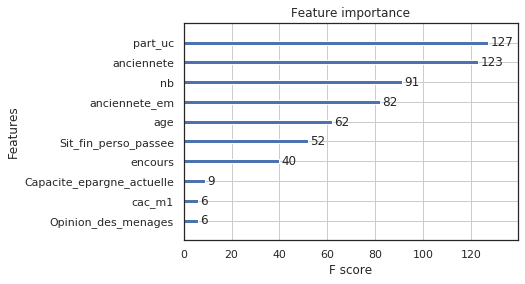

In [145]:
# fit model on all training data
xgb_enn = XGBClassifier(nthread=-1,random_state=42)
enn = EditedNearestNeighbours(n_jobs=-1, random_state=42)
X_enn, y_enn = enn.fit_resample(X_std, y)
xgb_enn.fit(pd.DataFrame(X_enn,columns = X_std.columns), y_enn)
plot_importance(xgb_enn,max_num_features=10)
plt.show()

In [146]:
pd.DataFrame(X_enn,columns = X_std.columns).shape,X_std.shape

((372895, 27), (376339, 27))

In [147]:
xgb_enn_pred = xgb_enn.predict(X_std)

print("Accuracy: %.2f%%" % (accuracy_score(y, xgb_enn_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y, xgb_enn_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y, xgb_enn_pred)

Accuracy: 99.63%
MCC: 51.20%

Confusion Matrix


array([[374319,    207],
       [  1179,    634]])

In [ ]:
# fit model on all training data
xgb_tomek = XGBClassifier(nthread=-1,random_state=42)
tomek = TomekLinks(n_jobs=-1, ratio='majority', random_state=42)
X_tomek, y_tomek = tomek.fit_resample(X_std, y)
xgb_tomek.fit(pd.DataFrame(X_tomek,columns = X_std.columns), y_tomek)
plot_importance(xgb_tomek,max_num_features=10)
plt.show()

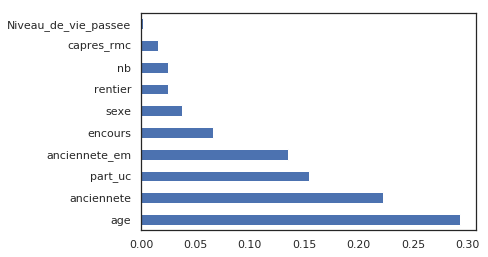

In [274]:
feat_importances = pd.Series(model.feature_importances_, index=X_std.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [266]:
feat_labels =  X.dtypes.pipe(lambda x: x).index

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_std, y)
for feature in zip(feat_labels, rf.feature_importances_):
    print(feature)

('sexe', 0.03599162495106606)
('tmg_round', 0.0004765072148666563)
('nb_support', 0.0)
('age', 0.3225046571181147)
('anciennete', 0.2223971437803953)
('anciennete_em', 0.12520401124213462)
('part_uc', 0.1500089163612176)
('encours', 0.06284470595257911)
('capres_rmc', 0.013873418202691523)
('rentier', 0.02427650758258276)
('cac_m1', 0.0010441839136191673)
('cac_m2', 0.001181337666393035)
('cac_m3', 0.0009938758264552432)
('cac_m12', 0.0012954930947141105)
('Opinion_des_menages', 0.0014689551826166077)
('Niveau_de_vie_passee', 0.001667647068898023)
('Niveau_de_vie_evolution', 0.001422464494511546)
('Chomage_evolution', 0.0014663198092449334)
('Prix_evol_passee', 0.0013623440023211835)
('Prix_evol_futur', 0.0010255055879558666)
('Opportunite_achats_importants', 0.001057903442326442)
('Opportunite_epargner', 0.0010681820987418571)
('Capacite_epargne_actuelle', 0.0010463168749356377)
('Sit_fin_perso_passee', 0.001938481806104799)
('Sit_fin_perso_evolution', 0.0015804173795109014)
('Capacit

In [267]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age,0.322505
anciennete,0.222397
part_uc,0.150009
anciennete_em,0.125204
encours,0.062845
sexe,0.035992
rentier,0.024277
nb,0.021719
capres_rmc,0.013873
Sit_fin_perso_passee,0.001938


[3.53707087e-02 2.82518297e-04 0.00000000e+00 3.14965851e-01
 2.24487213e-01 1.29433284e-01 1.44096416e-01 6.54294973e-02
 1.55422387e-02 2.53261848e-02 1.19997890e-03 1.43127917e-03
 1.42503765e-03 1.11481793e-03 1.84416815e-03 1.65302776e-03
 1.59410988e-03 1.64461446e-03 1.50232565e-03 1.36937690e-03
 1.78018334e-03 1.22100398e-03 1.25430953e-03 1.72948154e-03
 1.58028917e-03 1.65955807e-03 2.10625264e-02]


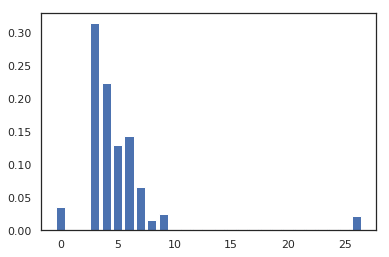

In [268]:
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

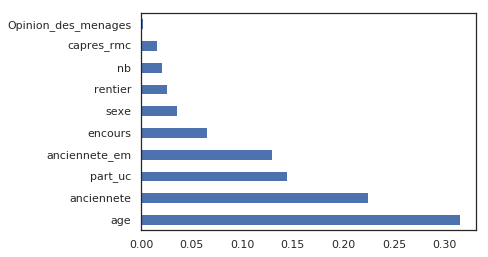

In [269]:
feat_importances = pd.Series(model.feature_importances_, index=X_std.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [103]:
# import packages
# matplotlib inline
from scipy import stats
import tensorflow as tf
import pickle
from pylab import rcParams
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [154]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_std, y)
sfm = SelectFromModel(rfc, threshold = 0.01, prefit=True)
X_auto = pd.DataFrame(sfm.transform(X), columns = X.columns[sfm.get_support()])

In [155]:
df_auto = X_auto.join(y)
df_auto.columns, df_auto.shape, type(df_auto)

(Index(['sexe', 'age', 'anciennete', 'anciennete_em', 'part_uc', 'encours',
        'capres_rmc', 'rentier', 'nb', 'arb'],
       dtype='object'), (376339, 10), pandas.core.frame.DataFrame)

In [48]:
xgb = XGBClassifier(n_estimators=100, nthread=-1,random_state=42)
xgb.fit(X_std, y)
sfm = SelectFromModel(xgb, threshold = 0.01, prefit=True)
X_auto = pd.DataFrame(sfm.transform(X), columns = X.columns[sfm.get_support()])

In [49]:
np.unique(xgb.feature_importances_)

array([0.        , 0.0015873 , 0.0031746 , 0.00793651, 0.00952381,
       0.01587302, 0.05396825, 0.07777778, 0.10952381, 0.13333334,
       0.13968255, 0.2       , 0.2031746 ], dtype=float32)

In [50]:
df_auto = pd.merge(X_auto, y, left_index=True, right_index=True)
df_auto.columns, df_auto.shape, type(df_auto)

(Index(['age', 'anciennete', 'anciennete_em', 'part_uc', 'encours',
        'Capacite_epargne_actuelle', 'Sit_fin_perso_passee', 'nb', 'arb'],
       dtype='object'), (376339, 9), pandas.core.frame.DataFrame)

In [51]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test = train_test_split(df, test_size=test_size, random_state=seed)

X_train = X_train[X_train.arb == 0] #where normal transactions
X_train = X_train.drop(['arb'], axis=1) #drop the class column

y_test = X_test['arb'] #save the class column for the test set
X_test = X_test.drop(['arb'], axis=1) #drop the class column

mm_scaler = MinMaxScaler().fit(X_train)
X_train_std = mm_scaler.transform(X_train)
X_test_std = mm_scaler.transform(X_test)

In [52]:
# Autoencoder Layer Structure and Parameters
nb_epoch = 50
batch_size = 128
input_dim = X_train_std.shape[1] #num of columns
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Instructions for updating:
Colocations handled automatically by placer.


In [59]:
# Model Training and Logging
from keras import backend as K

def matthews_correlation(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())

autoencoder.compile(metrics=['accuracy', matthews_correlation],
                    loss='binary_crossentropy',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud_agg.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train_std, X_train_std,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_std, X_test_std),
                    verbose=1,
                    callbacks=[cp, tb]).history

Instructions for updating:
Use tf.cast instead.
Train on 250978 samples, validate on 124192 samples
Epoch 1/50
250978/250978 [==============================] - 8s 33us/step - loss: 2.9862 - acc: 0.2823 - matthews_correlation: 0.2909 - val_loss: 2.4294 - val_acc: 0.2959 - val_matthews_correlation: 0.3865
Epoch 2/50
250978/250978 [==============================] - 8s 30us/step - loss: 1.6724 - acc: 0.3055 - matthews_correlation: 0.4943 - val_loss: 1.4411 - val_acc: 0.3126 - val_matthews_correlation: 0.5525
Epoch 3/50
250978/250978 [==============================] - 7s 30us/step - loss: 0.9475 - acc: 0.3178 - matthews_correlation: 0.5850 - val_loss: 0.7170 - val_acc: 0.3230 - val_matthews_correlation: 0.6116
Epoch 4/50
250978/250978 [==============================] - 8s 30us/step - loss: 0.7190 - acc: 0.3229 - matthews_correlation: 0.6171 - val_loss: 0.7149 - val_acc: 0.3245 - val_matthews_correlation: 0.6290
Epoch 5/50
250978/250978 [==============================] - 8s 32us/step - loss:

250978/250978 [==============================] - 13s 52us/step - loss: 0.4133 - acc: 0.3354 - matthews_correlation: 0.7638 - val_loss: 0.3823 - val_acc: 0.3367 - val_matthews_correlation: 0.7877
Epoch 40/50
250978/250978 [==============================] - 13s 53us/step - loss: 0.3817 - acc: 0.3370 - matthews_correlation: 0.7823 - val_loss: 0.3810 - val_acc: 0.3370 - val_matthews_correlation: 0.7810
Epoch 41/50
250978/250978 [==============================] - 15s 59us/step - loss: 0.3816 - acc: 0.3367 - matthews_correlation: 0.7763 - val_loss: 0.3855 - val_acc: 0.3365 - val_matthews_correlation: 0.7715
Epoch 42/50
250978/250978 [==============================] - 14s 57us/step - loss: 0.3813 - acc: 0.3368 - matthews_correlation: 0.7773 - val_loss: 0.3805 - val_acc: 0.3373 - val_matthews_correlation: 0.7788
Epoch 43/50
250978/250978 [==============================] - 8s 33us/step - loss: 0.3889 - acc: 0.3364 - matthews_correlation: 0.7641 - val_loss: 0.3816 - val_acc: 0.3370 - val_matthew

In [90]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 27)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                392       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 27)                216       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


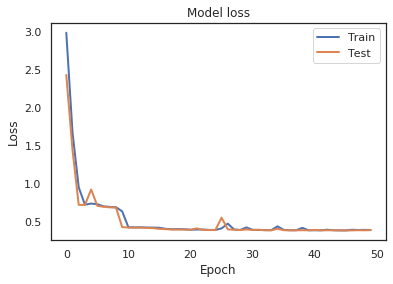

In [61]:
# Model Loss
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [76]:
# Reconstruction Error Check
X_test_predictions = autoencoder.predict(X_test_std)
mse = np.mean(np.power(X_test_std - X_test_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

,Reconstruction_error,True_class
count,124192.000000,124192.000000
mean,0.031986,0.005186
std,0.028890,0.071824
min,0.003146,0.000000
25%,0.012457,0.000000
50%,0.018723,0.000000
75%,0.048185,0.000000
max,0.210081,1.000000


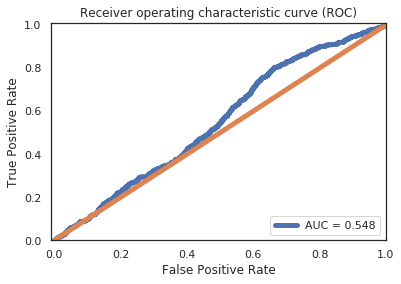

In [77]:
# ROC Curve Check
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

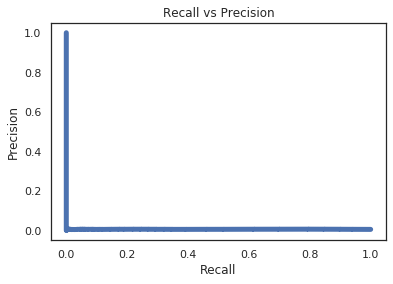

In [66]:
# Recall vs. Precision Thresholding
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large

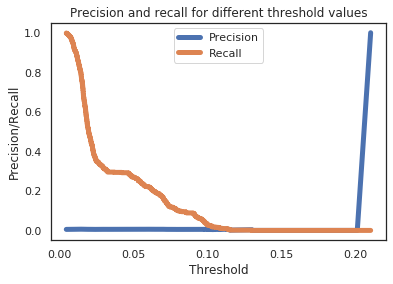

In [67]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

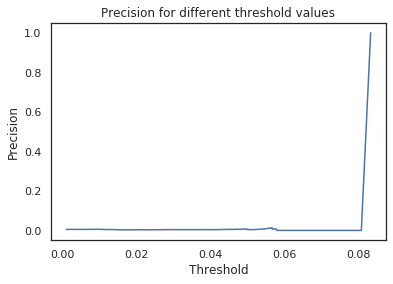

In [233]:
plt.plot(threshold_rt, precision_rt[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

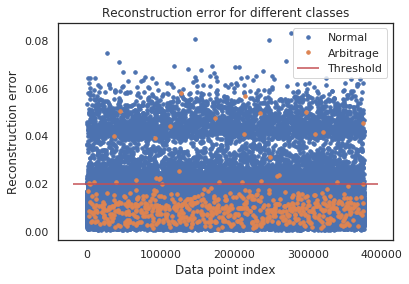

In [234]:
# Reconstruction Error vs Threshold Check
threshold_fixed = 0.02
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Arbitrage" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

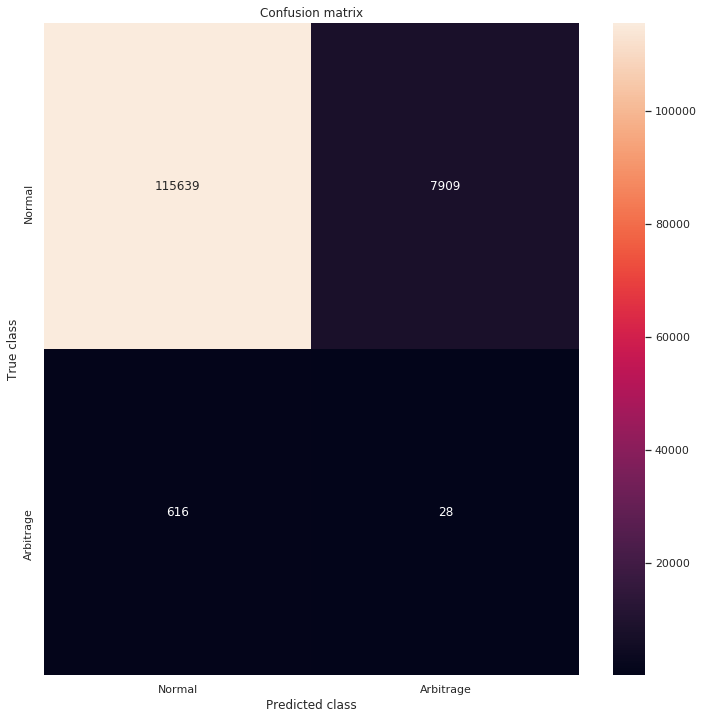

In [235]:
# Confusion Matrix
LABELS = ["Normal","Arbitrage"]

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [110]:
thresholds = np.linspace(0.001, 0.99,990)
Yhat = autoencoder.predict(X_test_std)
roc_auc_ = np.array([roc_auc_score(y_test, Yhat>thr) for thr in thresholds])
plt.plot(thresholds, roc_auc_)
best_threshold = thresholds[roc_auc_.argmax()]
print(best_threshold)
print(roc_auc_.max())

ValueError: bad input shape (124192, 2)

(124192, 27)

In [ ]:
predictions = (Yhat>best_threshold)

print(confusion_matrix(reel, predictions))
print('accuracy_score: %f' % accuracy_score(reel, predictions ))
print('test roc score: %f' % roc_auc_score(reel, Yhat ))
print('mcc score: %f' %matthews_corrcoef(reel, predictions ))
print('F1 score: %f' %f1_score(reel, predictions ))
print('precision score: %f' %precision_score(reel, predictions ))
print('recall score: %f' %recall_score(reel, predictions ))
